In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('test_and_train_auctions/train_data_encoded.csv')
test = pd.read_csv('test_and_train_auctions/test_data_encoded.csv')

train2 = pd.read_csv('test_and_train_auctions/train_data_encoded2.csv')
test2 = pd.read_csv('test_and_train_auctions/test_data_encoded2.csv')

train3 = pd.read_csv('test_and_train_auctions/train_data_encoded3.csv')
test3 = pd.read_csv('test_and_train_auctions/test_data_encoded3.csv')

train4 = pd.read_csv('test_and_train_auctions/train_data_encoded4.csv')
test4 = pd.read_csv('test_and_train_auctions/test_data_encoded4.csv')

In [3]:
ref_hashes = train['ref_hash']
del train['ref_hash']
del test['ref_hash']

del train2['ref_hash']
del test2['ref_hash']

del train3['ref_hash']
del test3['ref_hash']

del train4['ref_hash']
del test4['ref_hash']

In [4]:
Xtrain, ytrain = train.iloc[:,:-1],train.iloc[:,-1]
Xtest, ytest = test.iloc[:,:-1],test.iloc[:,-1]

Xtrain2, ytrain2 = train2.iloc[:,:-1],train2.iloc[:,-1]
Xtest2, ytest2 = test2.iloc[:,:-1],test2.iloc[:,-1]

Xtrain3, ytrain3 = train3.iloc[:,:-1],train3.iloc[:,-1]
Xtest3, ytest3 = test3.iloc[:,:-1],test3.iloc[:,-1]

Xtrain4, ytrain4 = train4.iloc[:,:-1],train4.iloc[:,-1]
Xtest4, ytest4 = test4.iloc[:,:-1],test4.iloc[:,-1]

In [5]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [6]:
# Entrenamiento
xg_reg.fit(Xtrain,ytrain)

/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [7]:
# Prediccion
preds = xg_reg.predict(Xtest)

In [8]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 79202.322876


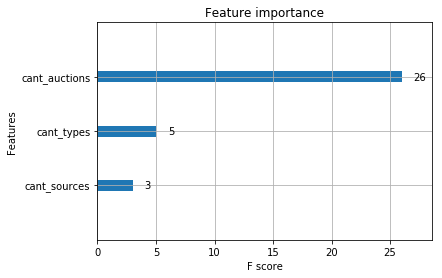

In [9]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [10]:
df_predicciones = pd.DataFrame(ref_hashes)
df_predicciones['predictions_v1'] = preds
df_predicciones['ytest_v1'] = ytest
df_predicciones

,ref_hash,predictions_v1,ytest_v1
0,1000169251625791246_st,83309.531250,167776.943525
1,1000395625957344683_st,83437.531250,146573.807116
2,1003027494996471685_st,83309.531250,73885.989196
3,1006670001679961544_st,168745.031250,259200.000000
4,1007573308966476713_st,83309.531250,186611.246260
5,1010070503877148763_st,83794.359375,146233.135303
6,1010265377387765028_st,84561.210938,53093.115074
7,1010531372912327058_st,83794.359375,139566.262287
8,1011610998357271358_st,168745.031250,259200.000000
9,1013543838965040946_st,83794.359375,191095.993332


In [11]:
# Entrenamiento 2
xg_reg.fit(Xtrain2,ytrain2)

/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [12]:
# Prediccion 3
preds2 = xg_reg.predict(Xtest2)

In [13]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest2, preds2))
print("RMSE: %f" % (rmse))

RMSE: 78143.564836


In [14]:
df_predicciones['predictions_v2'] = preds2
df_predicciones['ytest_v2'] = ytest2
df_predicciones

,ref_hash,predictions_v1,ytest_v1,predictions_v2,ytest_v2
0,1000169251625791246_st,83309.531250,167776.943525,82609.679688,161301.989335
1,1000395625957344683_st,83437.531250,146573.807116,86000.875000,178488.396379
2,1003027494996471685_st,83309.531250,73885.989196,86968.203125,206396.254322
3,1006670001679961544_st,168745.031250,259200.000000,87919.851562,237657.606340
4,1007573308966476713_st,83309.531250,186611.246260,82609.679688,184128.773806
5,1010070503877148763_st,83794.359375,146233.135303,87919.851562,59833.135303
6,1010265377387765028_st,84561.210938,53093.115074,168740.859375,259200.000000
7,1010531372912327058_st,83794.359375,139566.262287,87919.851562,140520.189819
8,1011610998357271358_st,168745.031250,259200.000000,87919.851562,182286.414765
9,1013543838965040946_st,83794.359375,191095.993332,84349.898438,201124.250109


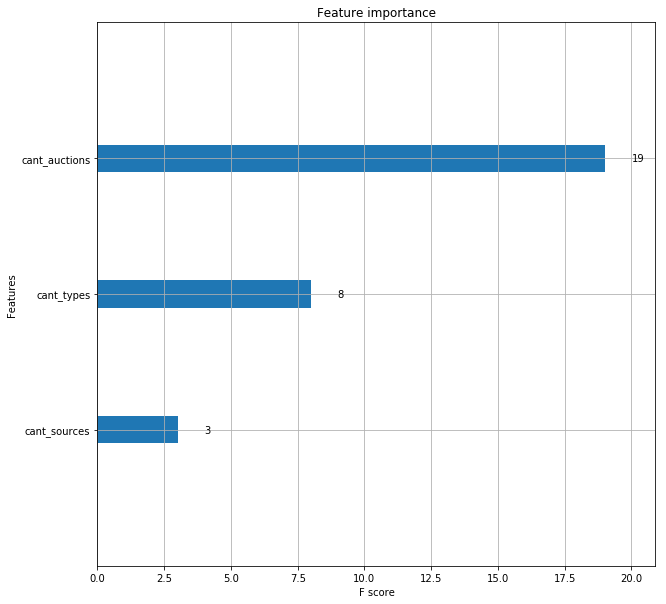

In [15]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [16]:
# Entrenamiento 3
xg_reg.fit(Xtrain3,ytrain3)

/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [17]:
# Prediccion 3
preds3 = xg_reg.predict(Xtest3)

In [18]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest3, preds3))
print("RMSE: %f" % (rmse))

RMSE: 77226.649345


In [19]:
df_predicciones['predictions_v3'] = preds3
df_predicciones['ytest_v3'] = ytest3
df_predicciones

,ref_hash,predictions_v1,ytest_v1,predictions_v2,ytest_v2,predictions_v3,ytest_v3
0,1000169251625791246_st,83309.531250,167776.943525,82609.679688,161301.989335,89731.148438,135330.237731
1,1000395625957344683_st,83437.531250,146573.807116,86000.875000,178488.396379,86996.515625,123016.970826
2,1003027494996471685_st,83309.531250,73885.989196,86968.203125,206396.254322,88359.281250,135601.555411
3,1006670001679961544_st,168745.031250,259200.000000,87919.851562,237657.606340,88455.898438,151257.606340
4,1007573308966476713_st,83309.531250,186611.246260,82609.679688,184128.773806,89479.148438,147496.042860
5,1010070503877148763_st,83794.359375,146233.135303,87919.851562,59833.135303,168729.875000,259200.000000
6,1010265377387765028_st,84561.210938,53093.115074,168740.859375,259200.000000,168729.875000,259200.000000
7,1010531372912327058_st,83794.359375,139566.262287,87919.851562,140520.189819,88915.953125,128327.727725
8,1011610998357271358_st,168745.031250,259200.000000,87919.851562,182286.414765,89479.148438,221351.908331
9,1013543838965040946_st,83794.359375,191095.993332,84349.898438,201124.250109,88886.453125,173177.625242


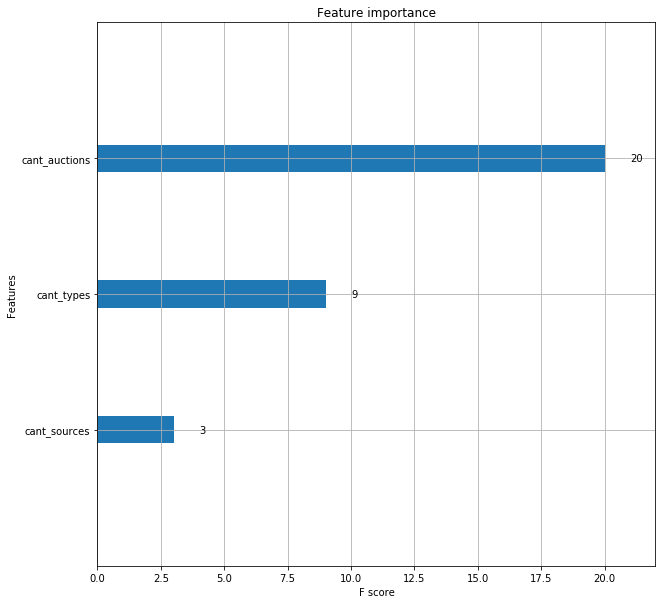

In [20]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [21]:
# Entrenamiento 4
xg_reg.fit(Xtrain4,ytrain4)

/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/santiago/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [22]:
# Prediccion 4
preds4 = xg_reg.predict(Xtest4)

In [23]:
# Error RMSE
rmse = np.sqrt(mean_squared_error(ytest4, preds4))
print("RMSE: %f" % (rmse))

RMSE: 80560.614810


In [24]:
df_predicciones['predictions_v4'] = preds4
df_predicciones['ytest_v4'] = ytest4
df_predicciones

,ref_hash,predictions_v1,ytest_v1,predictions_v2,ytest_v2,predictions_v3,ytest_v3,predictions_v4,ytest_v4
0,1000169251625791246_st,83309.531250,167776.943525,82609.679688,161301.989335,89731.148438,135330.237731,85169.328125,173729.838532
1,1000395625957344683_st,83437.531250,146573.807116,86000.875000,178488.396379,86996.515625,123016.970826,85533.812500,100672.999900
2,1003027494996471685_st,83309.531250,73885.989196,86968.203125,206396.254322,88359.281250,135601.555411,88856.828125,49201.555411
3,1006670001679961544_st,168745.031250,259200.000000,87919.851562,237657.606340,88455.898438,151257.606340,83659.390625,180137.098730
4,1007573308966476713_st,83309.531250,186611.246260,82609.679688,184128.773806,89479.148438,147496.042860,83659.390625,105133.480786
5,1010070503877148763_st,83794.359375,146233.135303,87919.851562,59833.135303,168729.875000,259200.000000,168722.656250,259200.000000
6,1010265377387765028_st,84561.210938,53093.115074,168740.859375,259200.000000,168729.875000,259200.000000,168722.656250,259200.000000
7,1010531372912327058_st,83794.359375,139566.262287,87919.851562,140520.189819,88915.953125,128327.727725,83659.390625,146924.324348
8,1011610998357271358_st,168745.031250,259200.000000,87919.851562,182286.414765,89479.148438,221351.908331,84609.171875,174865.780922
9,1013543838965040946_st,83794.359375,191095.993332,84349.898438,201124.250109,88886.453125,173177.625242,84609.171875,101790.450321


In [25]:
df2 = pd.DataFrame(ref_hashes)
df2['predictions'] = (df_predicciones['predictions_v1'] + df_predicciones['predictions_v2'] + df_predicciones['predictions_v3'] + df_predicciones['predictions_v4']) / 4
df2.to_csv('submit_kaggle/pred_auctions.csv', index=False)

In [26]:
df2

,ref_hash,predictions
0,1000169251625791246_st,85204.921875
1,1000395625957344683_st,85492.187500
2,1003027494996471685_st,86873.460938
3,1006670001679961544_st,107195.046875
4,1007573308966476713_st,84764.437500
5,1010070503877148763_st,127291.687500
6,1010265377387765028_st,147688.656250
7,1010531372912327058_st,86072.390625
8,1011610998357271358_st,107688.296875
9,1013543838965040946_st,85409.968750
